In [15]:
df <- read.csv("/content/breast-cancer.csv")

In [16]:
install.packages("reshape2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [17]:
head(df)

,shrink_mode,sample_idx,SHAP_age,SHAP_tumor.size,SHAP_inv.nodes,SHAP_node.caps,SHAP_breast,SHAP_irradiat,SHAP_menopause_0.0,SHAP_menopause_1.0,SHAP_menopause_2.0,SHAP_breast.quad_0.0,SHAP_breast.quad_1.0,SHAP_breast.quad_2.0,SHAP_breast.quad_3.0,SHAP_breast.quad_4.0,SHAP_deg.malig_0.0,SHAP_deg.malig_1.0,SHAP_deg.malig_2.0,replication
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,hs,0,0.080240143,0.002354373,0.14893076,0.067194955,0.01560947,-0.021316083,0.002025060,0.0136479642,0.03597573,0.015546607,-0.008405409,-0.008584710,-1.925655e-03,0.0040915278,0.002815278,0.04162783,0.10208383,0
2,hs,1,-0.056109726,0.030428678,-0.03767021,-0.013827884,0.01195629,-0.019012428,0.001814583,0.0006291746,-0.01049199,0.009458552,-0.018874222,-0.011971976,-4.264285e-04,-0.0056559522,-0.001644802,-0.05941351,-0.06727649,0
3,hs,2,-0.009749273,-0.050664546,0.06897307,0.009905897,0.03901358,0.035839910,-0.003346845,0.0195959048,0.01421893,0.011441237,-0.011790892,0.015111905,-9.710315e-04,-0.0013859800,-0.007721309,-0.03309884,-0.09228338,0
4,hs,3,0.031008225,0.008008054,0.05928625,0.013609663,-0.03985738,0.006698193,-0.002230833,-0.0107360196,-0.01318917,-0.008919461,-0.011280079,0.014225051,4.273821e-05,0.0002335714,-0.005256428,0.01274120,0.05370475,0
5,hs,4,0.065079642,0.025750410,0.05210987,0.026534606,0.02568300,-0.042931705,0.001916468,-0.0003451983,0.01666993,0.019446230,-0.008134658,-0.016771948,-3.037102e-04,0.0036951230,0.001068746,-0.03910326,-0.04845188,0
6,hs,5,-0.081398804,-0.036460360,-0.11741664,-0.038431127,0.01058634,0.024239841,-0.001777956,0.0050798891,-0.02408153,-0.012425297,0.013111892,0.009720996,1.555377e-03,-0.0023373808,-0.004872837,0.03376641,0.04922952,0


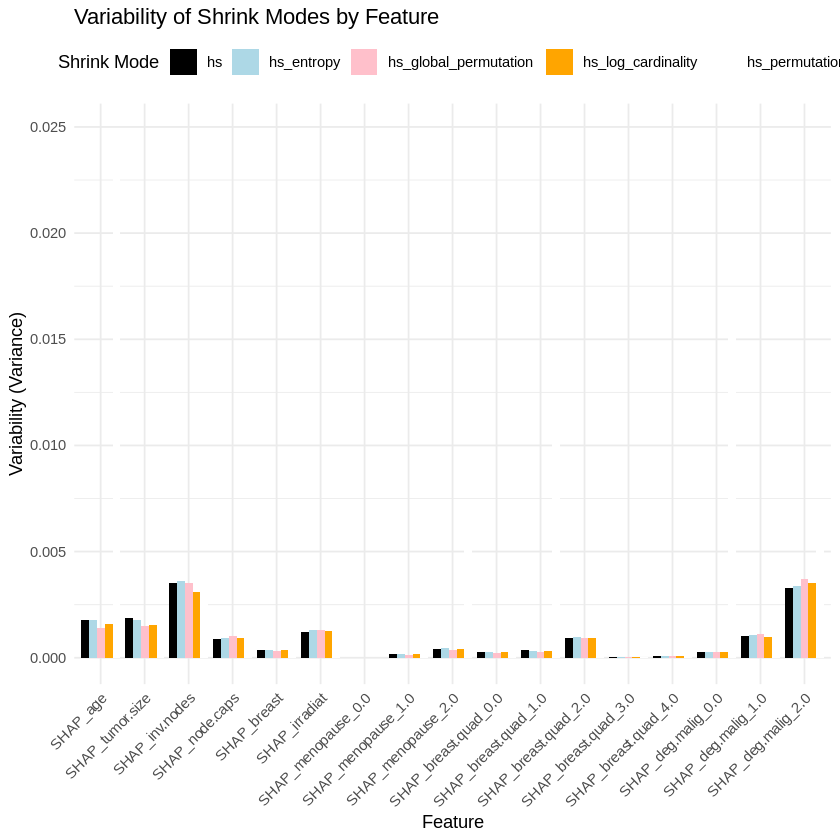

In [26]:
# Load the required libraries
library(ggplot2)
library(reshape2)

# Function to modify column names
modified <- function(df) {
  df <- data.frame(sapply(df, function(feature) {
    if (length(unlist(strsplit(feature, "_"))) > 1 && feature != 'shrink_mode' && feature != 'sample_idx') {
      return(paste(unlist(strsplit(feature, "_"))[2], collapse = " "))
    } else {
      return(feature)
    }
  }))
  colnames(df) <- colnames(df)
  return(df)
}

# Function to plot variability by feature and save as PDF
plot_variability_by_feature <- function(df, save_as_pdf = FALSE, pdf_filename = "plot.pdf") {
  # Melt the data frame to long format
  df_long <- melt(df, id.vars = c('shrink_mode', 'sample_idx', 'replication'))

  # Group by 'shrink_mode' and 'variable' (formerly 'feature') and calculate variance
  grouped_data <- aggregate(value ~ shrink_mode + variable, data = df_long, FUN = var)

  # Rename column names using the modified function
  colnames(grouped_data) <- c("shrink_mode", "feature", "variability")

  # Create a custom color palette with specific colors
  custom_palette <- c("black", "lightblue", "pink", "orange", "white")  # Specify your desired colors here

  # Create the ggplot object with the custom color palette
  p <- ggplot(grouped_data, aes(x = feature, y = variability, fill = shrink_mode)) +
    geom_bar(stat = "identity", position = "dodge") +
    labs(x = "Feature", y = "Variability (Variance)", title = "Variability of Shrink Modes by Feature") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1), legend.position = "top") +
    scale_fill_manual(values = custom_palette) +  # Set custom colors here
    guides(fill = guide_legend(title = "Shrink Mode"))

  # Save the plot as a PDF if save_as_pdf is TRUE
  if (save_as_pdf) {
    ggsave(pdf_filename, plot = p, device = "pdf", width = 12, height = 6, units = "in")
  }

  # Print the plot
  print(p)
}

# Example usage:
# Replace 'my_data' with your actual data frame
plot_variability_by_feature(df, save_as_pdf = TRUE, pdf_filename = "plot.pdf")
